# Traffic Camera: Detection and tracking


## Imports

We will start by importing a few libraries:

In [1]:
import matplotlib.pyplot as plt
from detectionprovider import DetectionProvider
from common import limit_gpu_memory
from CVTracker import CVTracker
from video import VideoStreamReader, VideoStreamWriter
from yolo import YOLO
from tqdm import tqdm
import cv2
limit_gpu_memory(0.7)

Using TensorFlow backend.


## Download 4K Traffic Cam Video

You will need **youtube-dl** to download the video. (You can ignore this step but still, you will need a video

In [2]:
!youtube-dl -f 313 MNn9qKG2UFI

[youtube] MNn9qKG2UFI: Downloading webpage


[youtube] MNn9qKG2UFI: Downloading video info webpage


[youtube] MNn9qKG2UFI: Extracting video information


[download] 4K Traffic camera video - free download now!-MNn9qKG2UFI.webm has already been downloaded
[download] 100% of 659.43MiB


## View first frame

We will use OpenCV and Matplotlib to view the very first frame:

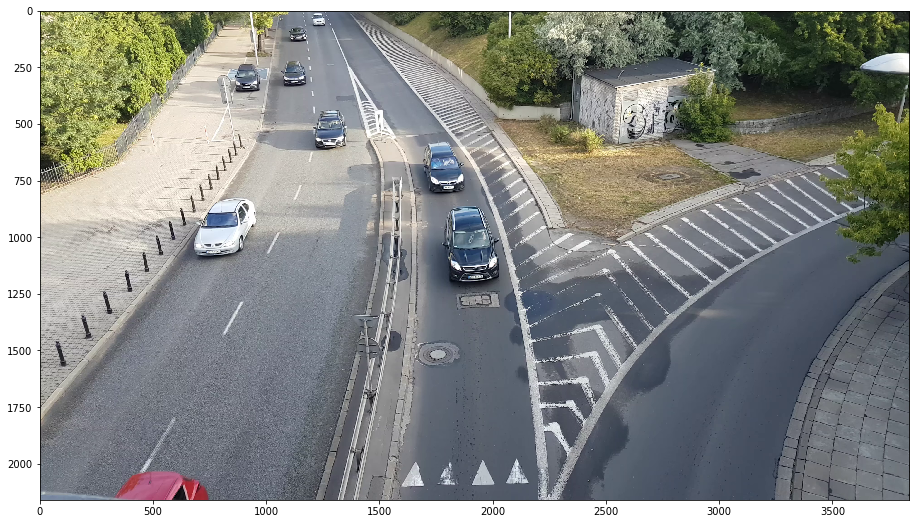

In [3]:
filename = "4K Traffic camera video - free download now!-MNn9qKG2UFI.webm"

reader = VideoStreamReader(filename, seconds_count=5, width=1920, height=1080)
frame = reader.next_frame()
reader.release()
plt.figure(figsize=(16,9))
plt.imshow(frame)
plt.show()

# Prepare YOLO network and generate initial bounding boxes for tracklets

In [4]:
yolo = YOLO(score=0.3)

model_data/yolo.h5 model, anchors, and classes loaded.


# Load frames and propagate through them

In [ ]:
filename = "4K Traffic camera video - free download now!-MNn9qKG2UFI.webm"
output_filename = "output_test2.avi"
padding = 80
seconds_skip = 0 # number of seconds to skip
seconds_count = 10 # number of seconds to process

reader = VideoStreamReader(filename, seconds_count=seconds_count, seconds_skip=seconds_skip, width=1920, height=1080)
writer = VideoStreamWriter(output_filename, width=reader.width,height=reader.height,fps=reader.fps)

yolo_update = 0.5 # detection update in seconds
fps_update = int(yolo_update * reader.fps)
detection_provider = DetectionProvider(yolo, inflate=0)
frame_bbox = Detection.from_frame((1920,1080), padding)
tracker = CVTracker(cv2.TrackerMOSSE_create, frame_bbox)
pbar = tqdm(total=reader.frame_count - reader.frame_skip)

while True:
    frame = reader.next_frame()
    if frame is None:
        break
        
    pbar.update()
    tracker.propagate(frame)
    if tracker.is_detection_time():
        detections = detection_provider.detect_boxes(frame, reader.frame_no)

        # for detection in detections:
        #     detection.show(frame, (255, 255, 255))

        tracker.provide_detections(detections)

    tracker.update()

    for t in tracker.old_tracks + tracker.new_tracks:
        t.show_history(frame)

    writer.write(frame)
    
pbar.close()
reader.release()
writer.release()

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 1/300 [00:00<01:08,  4.34it/s]

  1%|          | 2/300 [00:05<08:09,  1.64s/it]

  1%|          | 3/300 [00:05<06:24,  1.30s/it]

  1%|▏         | 4/300 [00:06<05:11,  1.05s/it]

  2%|▏         | 5/300 [00:06<04:19,  1.14it/s]

  2%|▏         | 6/300 [00:07<03:44,  1.31it/s]

  2%|▏         | 7/300 [00:07<03:19,  1.47it/s]

  3%|▎         | 8/300 [00:08<03:00,  1.61it/s]

  3%|▎         | 9/300 [00:08<02:48,  1.72it/s]

  3%|▎         | 10/300 [00:09<02:40,  1.81it/s]

  4%|▎         | 11/300 [00:09<02:34,  1.87it/s]

  4%|▍         | 12/300 [00:10<02:31,  1.90it/s]

  4%|▍         | 13/300 [00:10<02:29,  1.91it/s]

  5%|▍         | 14/300 [00:11<02:29,  1.91it/s]

  5%|▌         | 15/300 [00:11<02:29,  1.91it/s]

  5%|▌         | 16/300 [00:12<02:27,  1.93it/s]

  6%|▌         | 17/300 [00:14<05:20,  1.13s/it]

  6%|▌         | 18/300 [00:15<05:11,  1.10s/it]

  6%|▋         | 19/300 [00:16<04:58,  1.06s/it]

  7%|▋         | 20/300 [00:17<04:50,  1.04s/it]

  7%|▋         | 21/300 [00:18<04:29,  1.04it/s]

  7%|▋         | 22/300 [00:19<04:21,  1.06it/s]

  8%|▊         | 23/300 [00:20<04:14,  1.09it/s]

  8%|▊         | 24/300 [00:21<04:07,  1.12it/s]

  8%|▊         | 25/300 [00:21<03:56,  1.16it/s]

  9%|▊         | 26/300 [00:22<03:50,  1.19it/s]

  9%|▉         | 27/300 [00:23<03:46,  1.20it/s]

  9%|▉         | 28/300 [00:24<03:31,  1.29it/s]

 10%|▉         | 29/300 [00:24<03:25,  1.32it/s]

 10%|█         | 30/300 [00:25<03:22,  1.33it/s]

 10%|█         | 31/300 [00:26<03:15,  1.37it/s]

 11%|█         | 32/300 [00:27<04:40,  1.05s/it]

 11%|█         | 33/300 [00:28<04:16,  1.04it/s]

 11%|█▏        | 34/300 [00:29<03:55,  1.13it/s]

 12%|█▏        | 35/300 [00:30<03:43,  1.19it/s]

 12%|█▏        | 36/300 [00:30<03:25,  1.28it/s]

 12%|█▏        | 37/300 [00:31<03:14,  1.35it/s]

 13%|█▎        | 38/300 [00:32<03:07,  1.40it/s]

 13%|█▎        | 39/300 [00:32<03:09,  1.38it/s]

 13%|█▎        | 40/300 [00:33<03:03,  1.42it/s]

 14%|█▎        | 41/300 [00:34<03:03,  1.41it/s]

 14%|█▍        | 42/300 [00:34<02:59,  1.44it/s]

 14%|█▍        | 43/300 [00:35<02:56,  1.46it/s]

 15%|█▍        | 44/300 [00:36<02:54,  1.47it/s]

 15%|█▌        | 45/300 [00:36<02:55,  1.46it/s]

 15%|█▌        | 46/300 [00:37<03:01,  1.40it/s]

 16%|█▌        | 47/300 [00:40<05:19,  1.26s/it]

 16%|█▌        | 48/300 [00:41<05:00,  1.19s/it]

 16%|█▋        | 49/300 [00:42<05:00,  1.20s/it]

 17%|█▋        | 50/300 [00:43<04:49,  1.16s/it]

 17%|█▋        | 51/300 [00:44<04:37,  1.12s/it]

 17%|█▋        | 52/300 [00:45<04:28,  1.08s/it]

 18%|█▊        | 53/300 [00:46<04:08,  1.01s/it]

 18%|█▊        | 54/300 [00:47<03:53,  1.05it/s]

 18%|█▊        | 55/300 [00:48<03:41,  1.10it/s]

 19%|█▊        | 56/300 [00:48<03:33,  1.14it/s]

 19%|█▉        | 57/300 [00:49<03:28,  1.16it/s]

 19%|█▉        | 58/300 [00:50<03:25,  1.18it/s]

 20%|█▉        | 59/300 [00:51<03:23,  1.18it/s]

 20%|██        | 60/300 [00:52<03:24,  1.17it/s]

 20%|██        | 61/300 [00:53<03:27,  1.15it/s]

 21%|██        | 62/300 [00:56<06:04,  1.53s/it]

 21%|██        | 63/300 [00:57<05:27,  1.38s/it]

 21%|██▏       | 64/300 [00:58<05:06,  1.30s/it]

 22%|██▏       | 65/300 [00:59<04:49,  1.23s/it]

 22%|██▏       | 66/300 [01:00<04:38,  1.19s/it]

 22%|██▏       | 67/300 [01:01<04:28,  1.15s/it]

 23%|██▎       | 68/300 [01:02<04:21,  1.13s/it]

 23%|██▎       | 69/300 [01:03<04:19,  1.12s/it]

 23%|██▎       | 70/300 [01:04<04:08,  1.08s/it]

 24%|██▎       | 71/300 [01:05<03:55,  1.03s/it]

 24%|██▍       | 72/300 [01:06<03:45,  1.01it/s]

 24%|██▍       | 73/300 [01:07<03:39,  1.03it/s]

 25%|██▍       | 74/300 [01:08<03:35,  1.05it/s]

 25%|██▌       | 75/300 [01:09<03:34,  1.05it/s]

 25%|██▌       | 76/300 [01:10<03:29,  1.07it/s]

 26%|██▌       | 77/300 [01:12<04:50,  1.30s/it]

 26%|██▌       | 78/300 [01:13<04:06,  1.11s/it]

 26%|██▋       | 79/300 [01:13<03:35,  1.03it/s]

 27%|██▋       | 80/300 [01:14<03:17,  1.11it/s]

 27%|██▋       | 81/300 [01:15<03:14,  1.13it/s]

 27%|██▋       | 82/300 [01:16<03:06,  1.17it/s]

 28%|██▊       | 83/300 [01:16<02:54,  1.24it/s]

 28%|██▊       | 84/300 [01:17<02:47,  1.29it/s]

 28%|██▊       | 85/300 [01:18<02:57,  1.21it/s]

 29%|██▊       | 86/300 [01:19<02:57,  1.21it/s]

 29%|██▉       | 87/300 [01:20<02:51,  1.24it/s]

 29%|██▉       | 88/300 [01:20<02:45,  1.28it/s]

 30%|██▉       | 89/300 [01:21<02:48,  1.25it/s]

 30%|███       | 90/300 [01:22<02:41,  1.30it/s]

 30%|███       | 91/300 [01:22<02:37,  1.33it/s]

 31%|███       | 92/300 [01:24<03:38,  1.05s/it]

 31%|███       | 93/300 [01:25<03:18,  1.04it/s]

 31%|███▏      | 94/300 [01:26<03:04,  1.11it/s]

 32%|███▏      | 95/300 [01:27<02:58,  1.15it/s]

 32%|███▏      | 96/300 [01:27<02:54,  1.17it/s]

 32%|███▏      | 97/300 [01:28<03:07,  1.08it/s]

 33%|███▎      | 98/300 [01:29<02:58,  1.13it/s]

 33%|███▎      | 99/300 [01:30<02:49,  1.19it/s]

 33%|███▎      | 100/300 [01:31<02:43,  1.22it/s]

 34%|███▎      | 101/300 [01:31<02:38,  1.26it/s]

 34%|███▍      | 102/300 [01:32<02:34,  1.28it/s]

 34%|███▍      | 103/300 [01:33<02:31,  1.30it/s]

 35%|███▍      | 104/300 [01:34<02:18,  1.41it/s]

 35%|███▌      | 105/300 [01:34<02:08,  1.52it/s]

 35%|███▌      | 106/300 [01:34<01:52,  1.73it/s]

 36%|███▌      | 107/300 [01:36<02:33,  1.26it/s]

 36%|███▌      | 108/300 [01:36<02:12,  1.44it/s]

 36%|███▋      | 109/300 [01:37<01:59,  1.60it/s]

 37%|███▋      | 110/300 [01:37<01:50,  1.72it/s]

 37%|███▋      | 111/300 [01:38<01:43,  1.83it/s]

 37%|███▋      | 112/300 [01:38<01:38,  1.92it/s]

 38%|███▊      | 113/300 [01:39<01:34,  1.98it/s]

 38%|███▊      | 114/300 [01:39<01:32,  2.01it/s]

 38%|███▊      | 115/300 [01:40<01:32,  2.01it/s]

 39%|███▊      | 116/300 [01:40<01:30,  2.03it/s]

 39%|███▉      | 117/300 [01:41<01:29,  2.05it/s]

 39%|███▉      | 118/300 [01:41<01:28,  2.07it/s]

 40%|███▉      | 119/300 [01:41<01:27,  2.06it/s]

 40%|████      | 120/300 [01:42<01:26,  2.09it/s]

 40%|████      | 121/300 [01:42<01:25,  2.08it/s]

 41%|████      | 122/300 [01:44<02:30,  1.18it/s]

 41%|████      | 123/300 [01:45<02:19,  1.27it/s]

 41%|████▏     | 124/300 [01:45<02:09,  1.36it/s]

 42%|████▏     | 125/300 [01:46<02:03,  1.42it/s]

 42%|████▏     | 126/300 [01:47<01:59,  1.46it/s]

 42%|████▏     | 127/300 [01:47<01:55,  1.50it/s]

 43%|████▎     | 128/300 [01:48<01:53,  1.52it/s]

 43%|████▎     | 129/300 [01:49<01:52,  1.52it/s]

 43%|████▎     | 130/300 [01:49<01:51,  1.53it/s]

 44%|████▎     | 131/300 [01:50<01:50,  1.53it/s]

 44%|████▍     | 132/300 [01:51<01:50,  1.52it/s]

 44%|████▍     | 133/300 [01:51<01:50,  1.51it/s]

 45%|████▍     | 134/300 [01:52<01:50,  1.50it/s]

 45%|████▌     | 135/300 [01:53<01:49,  1.51it/s]

 45%|████▌     | 136/300 [01:53<01:50,  1.48it/s]

 46%|████▌     | 137/300 [01:56<03:49,  1.41s/it]

 46%|████▌     | 138/300 [01:57<03:17,  1.22s/it]

 46%|████▋     | 139/300 [01:58<03:06,  1.16s/it]

 47%|████▋     | 140/300 [01:59<02:49,  1.06s/it]

 47%|████▋     | 141/300 [02:00<02:41,  1.02s/it]

 47%|████▋     | 142/300 [02:01<02:46,  1.06s/it]

 48%|████▊     | 143/300 [02:02<02:35,  1.01it/s]

 48%|████▊     | 144/300 [02:03<02:28,  1.05it/s]

 48%|████▊     | 145/300 [02:04<02:25,  1.06it/s]

 49%|████▊     | 146/300 [02:05<02:21,  1.09it/s]

 49%|████▉     | 147/300 [02:05<02:17,  1.11it/s]

 49%|████▉     | 148/300 [02:06<02:23,  1.06it/s]

 50%|████▉     | 149/300 [02:07<02:22,  1.06it/s]

 50%|█████     | 150/300 [02:08<02:18,  1.08it/s]

 50%|█████     | 151/300 [02:09<02:16,  1.10it/s]

 51%|█████     | 152/300 [02:11<03:07,  1.26s/it]

 51%|█████     | 153/300 [02:12<02:47,  1.14s/it]

 51%|█████▏    | 154/300 [02:13<02:23,  1.02it/s]

 52%|█████▏    | 155/300 [02:13<02:05,  1.15it/s]

 52%|█████▏    | 156/300 [02:14<01:53,  1.27it/s]

 52%|█████▏    | 157/300 [02:15<01:45,  1.36it/s]

 53%|█████▎    | 158/300 [02:15<01:39,  1.42it/s]

 53%|█████▎    | 159/300 [02:16<01:35,  1.47it/s]

 53%|█████▎    | 160/300 [02:16<01:32,  1.52it/s]

 54%|█████▎    | 161/300 [02:17<01:30,  1.53it/s]

 54%|█████▍    | 162/300 [02:18<01:29,  1.54it/s]

 54%|█████▍    | 163/300 [02:18<01:27,  1.57it/s]

 55%|█████▍    | 164/300 [02:19<01:26,  1.57it/s]

 55%|█████▌    | 165/300 [02:20<01:25,  1.58it/s]

 55%|█████▌    | 166/300 [02:20<01:24,  1.58it/s]

 56%|█████▌    | 167/300 [02:22<02:15,  1.02s/it]

 56%|█████▌    | 168/300 [02:23<02:00,  1.09it/s]

 56%|█████▋    | 169/300 [02:23<01:49,  1.20it/s]

 57%|█████▋    | 170/300 [02:24<01:41,  1.28it/s]

 57%|█████▋    | 171/300 [02:25<01:36,  1.33it/s]

 57%|█████▋    | 172/300 [02:25<01:32,  1.38it/s]

 58%|█████▊    | 173/300 [02:26<01:29,  1.42it/s]

 58%|█████▊    | 174/300 [02:27<01:27,  1.44it/s]

 58%|█████▊    | 175/300 [02:27<01:25,  1.45it/s]

 59%|█████▊    | 176/300 [02:28<01:24,  1.46it/s]

 59%|█████▉    | 177/300 [02:29<01:23,  1.47it/s]

 59%|█████▉    | 178/300 [02:29<01:21,  1.49it/s]

 60%|█████▉    | 179/300 [02:30<01:20,  1.49it/s]

 60%|██████    | 180/300 [02:31<01:20,  1.49it/s]

 60%|██████    | 181/300 [02:31<01:20,  1.48it/s]

 61%|██████    | 182/300 [02:34<02:11,  1.11s/it]

 61%|██████    | 183/300 [02:34<01:57,  1.01s/it]

 61%|██████▏   | 184/300 [02:35<01:48,  1.06it/s]

 62%|██████▏   | 185/300 [02:36<01:42,  1.12it/s]

 62%|██████▏   | 186/300 [02:37<01:38,  1.16it/s]

 62%|██████▏   | 187/300 [02:37<01:35,  1.18it/s]

 63%|██████▎   | 188/300 [02:38<01:34,  1.19it/s]

 63%|██████▎   | 189/300 [02:39<01:33,  1.19it/s]

 63%|██████▎   | 190/300 [02:40<01:33,  1.18it/s]

 64%|██████▎   | 191/300 [02:41<01:33,  1.16it/s]

 64%|██████▍   | 192/300 [02:42<01:33,  1.15it/s]

 64%|██████▍   | 193/300 [02:43<01:34,  1.14it/s]

 65%|██████▍   | 194/300 [02:44<01:34,  1.12it/s]

 65%|██████▌   | 195/300 [02:45<01:34,  1.11it/s]

 65%|██████▌   | 196/300 [02:45<01:34,  1.10it/s]

 66%|██████▌   | 197/300 [02:48<02:10,  1.27s/it]

 66%|██████▌   | 198/300 [02:48<01:53,  1.11s/it]

 66%|██████▋   | 199/300 [02:49<01:41,  1.00s/it]

 67%|██████▋   | 200/300 [02:50<01:33,  1.07it/s]

 67%|██████▋   | 201/300 [02:51<01:27,  1.13it/s]

 67%|██████▋   | 202/300 [02:51<01:23,  1.18it/s]

 68%|██████▊   | 203/300 [02:52<01:20,  1.21it/s]

 68%|██████▊   | 204/300 [02:53<01:17,  1.23it/s]

 68%|██████▊   | 205/300 [02:54<01:16,  1.24it/s]

 69%|██████▊   | 206/300 [02:55<01:15,  1.25it/s]

 69%|██████▉   | 207/300 [02:55<01:14,  1.25it/s]

 69%|██████▉   | 208/300 [02:56<01:13,  1.25it/s]

 70%|██████▉   | 209/300 [02:57<01:12,  1.25it/s]

 70%|███████   | 210/300 [02:58<01:12,  1.25it/s]

 70%|███████   | 211/300 [02:59<01:11,  1.25it/s]

 71%|███████   | 212/300 [03:01<01:49,  1.24s/it]

 71%|███████   | 213/300 [03:02<01:40,  1.15s/it]

 71%|███████▏  | 214/300 [03:03<01:32,  1.08s/it]

 72%|███████▏  | 215/300 [03:04<01:27,  1.03s/it]

 72%|███████▏  | 216/300 [03:04<01:23,  1.00it/s]

 72%|███████▏  | 217/300 [03:05<01:20,  1.03it/s]

 73%|███████▎  | 218/300 [03:06<01:18,  1.04it/s]

 73%|███████▎  | 219/300 [03:07<01:13,  1.10it/s]

 73%|███████▎  | 220/300 [03:08<01:10,  1.14it/s]

 74%|███████▎  | 221/300 [03:09<01:07,  1.16it/s]

 74%|███████▍  | 222/300 [03:10<01:05,  1.19it/s]

 74%|███████▍  | 223/300 [03:10<01:04,  1.20it/s]

 75%|███████▍  | 224/300 [03:11<01:02,  1.21it/s]

 75%|███████▌  | 225/300 [03:12<01:02,  1.21it/s]

 75%|███████▌  | 226/300 [03:13<01:01,  1.20it/s]

 76%|███████▌  | 227/300 [03:15<01:32,  1.27s/it]

 76%|███████▌  | 228/300 [03:16<01:22,  1.15s/it]

 76%|███████▋  | 229/300 [03:17<01:15,  1.06s/it]

 77%|███████▋  | 230/300 [03:18<01:11,  1.02s/it]

 77%|███████▋  | 231/300 [03:19<01:07,  1.02it/s]

 77%|███████▋  | 232/300 [03:20<01:06,  1.02it/s]

 78%|███████▊  | 233/300 [03:21<01:04,  1.03it/s]

 78%|███████▊  | 234/300 [03:22<01:05,  1.01it/s]

 78%|███████▊  | 235/300 [03:23<01:04,  1.00it/s]

 79%|███████▊  | 236/300 [03:24<01:04,  1.00s/it]

 79%|███████▉  | 237/300 [03:25<01:05,  1.04s/it]

 79%|███████▉  | 238/300 [03:26<01:06,  1.07s/it]

 80%|███████▉  | 239/300 [03:27<01:06,  1.08s/it]

 80%|████████  | 240/300 [03:28<01:02,  1.05s/it]

 80%|████████  | 241/300 [03:29<00:59,  1.01s/it]

 81%|████████  | 242/300 [03:31<01:20,  1.38s/it]

 81%|████████  | 243/300 [03:32<01:13,  1.28s/it]

 81%|████████▏ | 244/300 [03:33<01:07,  1.20s/it]

 82%|████████▏ | 245/300 [03:34<01:03,  1.15s/it]

 82%|████████▏ | 246/300 [03:35<00:58,  1.08s/it]

 82%|████████▏ | 247/300 [03:36<00:54,  1.03s/it]

 83%|████████▎ | 248/300 [03:37<00:51,  1.01it/s]

 83%|████████▎ | 249/300 [03:38<00:49,  1.03it/s]

 83%|████████▎ | 250/300 [03:39<00:49,  1.00it/s]

 84%|████████▎ | 251/300 [03:40<00:49,  1.02s/it]

 84%|████████▍ | 252/300 [03:41<00:49,  1.03s/it]

 84%|████████▍ | 253/300 [03:42<00:47,  1.01s/it]

 85%|████████▍ | 254/300 [03:43<00:46,  1.00s/it]

 85%|████████▌ | 255/300 [03:44<00:44,  1.00it/s]

 85%|████████▌ | 256/300 [03:45<00:43,  1.01it/s]

 86%|████████▌ | 257/300 [03:48<01:10,  1.65s/it]

 86%|████████▌ | 258/300 [03:50<01:05,  1.56s/it]

 86%|████████▋ | 259/300 [03:51<01:02,  1.52s/it]

 87%|████████▋ | 260/300 [03:52<00:59,  1.49s/it]

 87%|████████▋ | 261/300 [03:54<00:56,  1.44s/it]

 87%|████████▋ | 262/300 [03:56<01:01,  1.62s/it]

 88%|████████▊ | 263/300 [03:57<01:00,  1.65s/it]

 88%|████████▊ | 264/300 [03:59<00:59,  1.67s/it]

 88%|████████▊ | 265/300 [04:01<00:58,  1.66s/it]

 89%|████████▊ | 266/300 [04:03<00:59,  1.76s/it]

 89%|████████▉ | 267/300 [04:04<00:53,  1.63s/it]

 89%|████████▉ | 268/300 [04:05<00:48,  1.51s/it]

 90%|████████▉ | 269/300 [04:07<00:45,  1.47s/it]

 90%|█████████ | 270/300 [04:08<00:41,  1.39s/it]

 90%|█████████ | 271/300 [04:09<00:39,  1.35s/it]

 91%|█████████ | 272/300 [04:13<00:59,  2.11s/it]

 91%|█████████ | 273/300 [04:15<00:53,  1.99s/it]

 91%|█████████▏| 274/300 [04:16<00:47,  1.82s/it]

 92%|█████████▏| 275/300 [04:18<00:43,  1.74s/it]

 92%|█████████▏| 276/300 [04:19<00:38,  1.62s/it]

 92%|█████████▏| 277/300 [04:21<00:37,  1.64s/it]

 93%|█████████▎| 278/300 [04:22<00:34,  1.56s/it]

 93%|█████████▎| 279/300 [04:24<00:31,  1.51s/it]

 93%|█████████▎| 280/300 [04:25<00:29,  1.47s/it]

 94%|█████████▎| 281/300 [04:26<00:27,  1.44s/it]

 94%|█████████▍| 282/300 [04:27<00:23,  1.32s/it]

 94%|█████████▍| 283/300 [04:28<00:21,  1.25s/it]

 95%|█████████▍| 284/300 [04:29<00:18,  1.13s/it]

 95%|█████████▌| 285/300 [04:30<00:15,  1.06s/it]

 95%|█████████▌| 286/300 [04:31<00:14,  1.02s/it]

 96%|█████████▌| 287/300 [04:33<00:17,  1.34s/it]

 96%|█████████▌| 288/300 [04:34<00:13,  1.16s/it]

 96%|█████████▋| 289/300 [04:35<00:11,  1.04s/it]

 97%|█████████▋| 290/300 [04:35<00:09,  1.05it/s]

 97%|█████████▋| 291/300 [04:36<00:08,  1.11it/s]

 97%|█████████▋| 292/300 [04:37<00:06,  1.17it/s]

 98%|█████████▊| 293/300 [04:38<00:05,  1.19it/s]

 98%|█████████▊| 294/300 [04:39<00:04,  1.22it/s]

 98%|█████████▊| 295/300 [04:39<00:04,  1.20it/s]

 99%|█████████▊| 296/300 [04:40<00:03,  1.23it/s]

 99%|█████████▉| 297/300 [04:41<00:02,  1.12it/s]

 99%|█████████▉| 298/300 [04:42<00:01,  1.14it/s]

100%|█████████▉| 299/300 [04:43<00:00,  1.16it/s]

100%|██████████| 300/300 [04:44<00:00,  1.11it/s]

301it [04:45,  1.04it/s]                         